# Supervised Learning with scikit-learn

In [2]:
# Importing pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the course datasets 
diabetes = pd.read_csv('datasets/diabetes_clean.csv')
music = pd.read_csv('datasets/music_clean.csv')
advertising = pd.read_csv('datasets/advertising_and_sales_clean.csv')
telecom = pd.read_csv("datasets/telecom_churn_clean.csv")

churn_df = telecom
sales_df = advertising
diabetes_df = diabetes
music_df=music


## Classification Model with K-Nearest Neighbors

## Definition of Classification

Classification is a supervised learning technique in machine learning that is used to predict the category or class of a given input data point. It is a type of predictive modeling where the goal is to assign a label or class to new, unseen data based on patterns and relationships learned from a labeled training dataset.

The classification model can be used for various applications such as spam detection, sentiment analysis, disease diagnosis, image recognition, and many more. Commonly used classification algorithms include logistic regression, decision trees, random forests, support vector machines, and k-nearest neighbors (KNN).

The KNN algorithm works by finding the K nearest neighbors of a given data point and classifying it based on the majority class of its neighbors.

In [5]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 


# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

Example of KNN Train, Fit and Evaluate (Score)

In [ ]:
# Import the module
from sklearn.model_selection import train_test_split 

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


## Overfitting and Underfitting

Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. The aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

In [9]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


## Visualizing the Trade-off of K

Training accuracy decreases as the number of neighbors initially gets larger, and vice versa for the testing accuracy. To visualize the trade-off between the amount of k and the performance of the K-Nearest Neighbors algorithm, plot the accuracy score for different values of k. 

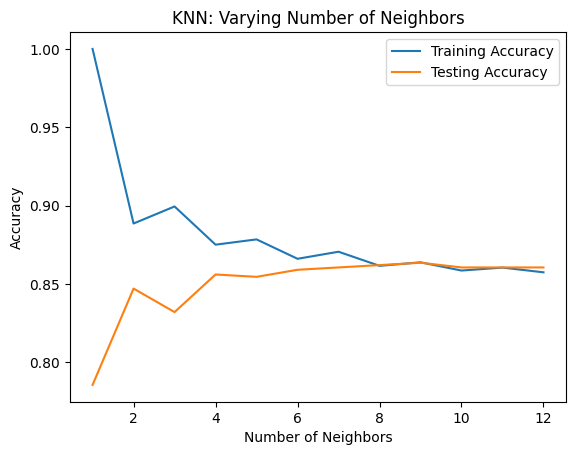

In [16]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

Training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for the model.

## Confusion Matrix

A confusion matrix is often used to describe the performance of a classification model and allows visualization of the performance of an algorithm. The main diagonal of the matrix represents the correct predictions, while the off-diagonal elements represent the incorrect predictions.

|              | Predicted Positive | Predicted Negative |
|--------------|--------------------|--------------------|
| Actual Positive | True Positive (TP) | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN) |

The confusion matrix is used to calculate various performance metrics such as accuracy, precision, recall, and F1 score.

In [17]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       570
           1       0.67      0.06      0.11        97

    accuracy                           0.86       667
   macro avg       0.76      0.53      0.52       667
weighted avg       0.83      0.86      0.81       667

[[567   3]
 [ 91   6]]


## Precision

Precision measures the proportion of true positive predictions out of the total number of positive predictions. It indicates how well the model predicts positive instances correctly.
```
Precision = TP / (TP + FP)
```
A high precision value indicates that the model has a low false positive rate, meaning it correctly identifies positive instances without many false alarms.

## Recall

Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of the total number of actual positive observations. It indicates how well the model captures positive instances.
```
Recall = TP / (TP + FN)
```
A high recall value indicates that the model has a low false negative rate, meaning it correctly identifies most positive instances.

## F1 Score

The F1 score combines both precision and recall into a single value. It is the harmonic mean of precision and recall, and provides a balanced measure of the model's performance.
```
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
```
The F1 score ranges from 0 to 1, where a value of 1 indicates perfect precision and recall, and a value of 0 indicates poor performance.

The F1 score is particularly useful in situations where both precision and recall are important, such as in binary classification problems where the classes are imbalanced.

## Linear Regression

Linear regression is a supervised learning algorithm used to predict a continuous target variable based on one or more input features. It assumes a linear relationship between the input features and the target variable.

The goal of linear regression is to find the best-fit line that minimizes the sum of the squared differences between the predicted and actual values.

Linear regression can be extended to multiple input features, resulting in multiple linear regression:

```
y = b0 + b1*x1 + b2*x2 + ... + bn*xn
```

Where:
- `y` is the target variable
- `x1, x2, ..., xn` are the input features
- `b0, b1, b2, ..., bn` are the coefficients of the linear regression model

Linear regression can be used for both simple and complex regression problems, and it is widely used in various fields such as economics, finance, and social sciences.


In [31]:
# Import LinearRegression, train_test module and mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

# Create X and y arrays
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]
R^2: 0.9990152104759368
RMSE: 2944.4331996001006


## Cross Validation

Cross-validation is a technique used in machine learning to evaluate the performance of a model on unseen data. It involves splitting the available data into multiple subsets or folds. The model is trained on a subset of the data and evaluated on the remaining fold. This process is repeated multiple times, with each fold serving as the test set once. The performance metrics obtained from each iteration are then averaged to get an overall performance measure.

There are different types of cross-validation techniques, such as:

- **K-Fold Cross Validation**: The data is divided into K equal-sized folds. The model is trained on K-1 folds and evaluated on the remaining fold. This process is repeated K times, with each fold serving as the test set once.

- **Stratified K-Fold Cross Validation**: Similar to K-Fold Cross Validation, but it ensures that each fold has approximately the same proportion of target variable classes as the original dataset.

- **Leave-One-Out Cross Validation (LOOCV)**: Each observation is used as a test set, and the rest of the data is used for training. This process is repeated for each observation.

- **Time Series Cross Validation**: Used for time series data, where the data is split into training and test sets based on time.

Cross-validation helps in assessing the model's ability to generalize to unseen data and provides a more reliable estimate of the model's performance.


### Notes on Cross-Tabs (not strictly relevant)

Can use cross-tab to count values between 2 features,

```
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))
Company_Size       L   M   S
Job_Category                
Data Analytics    23  61   8
Data Engineering  28  72  11
Data Science      38  59  16
Machine Learning  17  19  13
Managerial         5   8   1
Other             13   9   6
```

Can perform further joins and aggregates on the cross-tab as follows:

```
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))
Company_Size               L           M          S
Job_Category                                       
Data Analytics    112851.749   95912.685  53741.877
Data Engineering  118939.035  121287.061  86927.136
Data Science       96489.520  116044.456  62241.749
Machine Learning  140779.492  100794.237  78812.586
Managerial        190551.449  150713.628  31484.700
Other              92873.911   89750.579  69871.248
```
Instead of returning the intersection counts, code returns the mean salary of the intercepts.

## K-Fold Cross Validation

K-Fold Cross Validation is a specific type of cross-validation technique. It involves dividing the data into K equal-sized folds. The model is trained on K-1 folds and evaluated on the remaining fold. This process is repeated K times, with each fold serving as the test set once.

The steps involved in K-Fold Cross Validation are as follows:

1. Split the data into K equal-sized folds.
2. For each fold:
   - Train the model on K-1 folds.
   - Evaluate the model on the remaining fold.
3. Calculate the performance metric (e.g., accuracy, mean squared error) for each fold.
4. Average the performance metrics obtained from each fold to get an overall performance measure.

K-Fold Cross Validation helps in assessing the model's performance and provides a more reliable estimate of the model's ability to generalize to unseen data. It is commonly used in machine learning to tune hyperparameters, compare different models, and evaluate model performance.


In [33]:
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))


[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]
0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


## Regularized Regression

Regularized regression is a technique used in machine learning to prevent overfitting and improve the generalization performance of a model. It involves adding a regularization term to the loss function during model training.

There are two commonly used types of regularized regression:

1. Ridge Regression (L2 regularization): It adds the squared sum of the coefficients multiplied by a regularization parameter to the loss function. This penalty term encourages the model to have smaller coefficient values.

2. Lasso Regression (L1 regularization): It adds the sum of the absolute values of the coefficients multiplied by a regularization parameter to the loss function. This penalty term encourages the model to have sparse coefficient values, effectively performing feature selection.

Elastic Net regression combines both Ridge and Lasso regularization. It adds both the squared values and the absolute values of the model parameters multiplied by their respective alpha values to the loss function. Elastic Net provides a balance between Ridge and Lasso, allowing for both coefficient shrinkage and feature selection.

Regularized regression helps to control the complexity of the model and reduce the impact of irrelevant features, leading to better generalization performance on unseen data.

In [35]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


[ 3.56256962 -0.00397035  0.00496385]


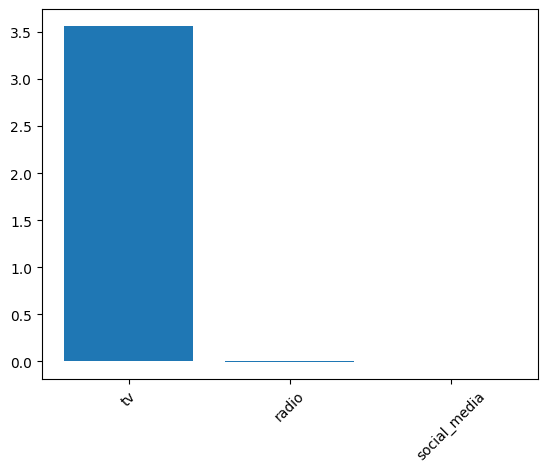

In [37]:
# Import Lasso
from sklearn.linear_model import Lasso

sales_columns = sales_df.drop(["sales","influencer"], axis=1).columns.values

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

## Logistic Regression

Logistic regression is a statistical model used to predict the probability of a binary outcome based on one or more predictor variables and is commonly used for classification tasks. The goal is to find the best-fitting model that relates the predictor variables to the probability of the binary outcome.

The logistic regression model uses the logistic function, also known as the sigmoid function, to transform the linear combination of the predictor variables into a probability value between 0 and 1.

The logistic regression model can be trained using various optimization algorithms, such as gradient descent, to find the optimal values for the coefficients of the predictor variables.


In [40]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create X and y arrays
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.26551023 0.18336622 0.12119649 0.15613528 0.49611198 0.44582198
 0.01359247 0.61646098 0.55640532 0.79311792]


## ROC Curve

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model. It illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for different classification thresholds.

The ROC curve plots the true positive rate (TPR) and the false positive rate (FPR) at different classification thresholds. These rates can be calculated using the predicted probabilities and the true labels of the test data.

The ROC curve is useful for evaluating the performance of a classification model and comparing different models. A model with a higher ROC curve (closer to the top-left corner) is considered to have better predictive power.

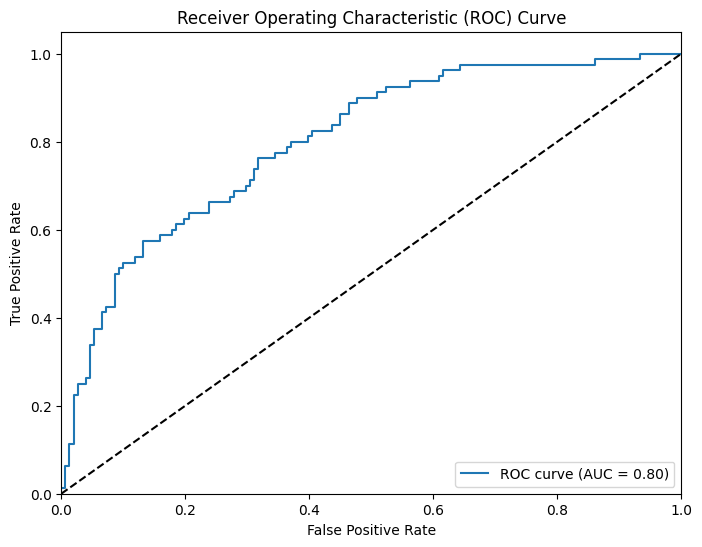

In [41]:
# Import roc_curve and auc
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate the area under the ROC curve (AUC)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The area under the ROC curve (AUC) is a measure of the model's ability to distinguish between the positive and negative classes. A perfect classifier will have an AUC of 1, while a random classifier will have an AUC of 0.5.

The ROC AUC score ranges from 0 to 1, with higher values indicating better performance. It provides a single value that summarizes the model's performance across all possible classification thresholds.

In [ ]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

<script.py> output:
        
    0.8002483443708608
    [[121  30]
     [ 30  50]]
                  precision    recall  f1-score   support
    
               0       0.80      0.80      0.80       151
               1       0.62      0.62      0.62        80
    
        accuracy                           0.74       231
       macro avg       0.71      0.71      0.71       231
    weighted avg       0.74      0.74      0.74       231

## Hyperparameter Tuning

Hyperparameter tuning is the process of finding the best combination of hyperparameters for a machine learning model. Hyperparameters are parameters that are not learned from the data, but are set before the learning process begins. They control the behavior of the model and can have a significant impact on its performance.

The goal of hyperparameter tuning is to find the hyperparameter values that optimize the performance of the model on a given task or dataset. This is typically done by evaluating the model's performance on a validation set or using cross-validation.

Hyperparameter tuning can be done manually by trying different combinations of hyperparameter values and evaluating the model's performance, or it can be automated using techniques such as grid search, random search, or Bayesian optimization.

By tuning the hyperparameters, we can improve the model's performance and make it more suitable for the specific task at hand.

## Grid Search

GridSearchCV useful method for searching solution space of hyperparameters which yield the optimal outcome, however not useful when the solution space is particular large eg 10 fold cross-validation with 3 hyper-paramters results in 30 values with 900 fits.
RandomisedSearchCV useful for searching particularly large solution spaces.

After tuning the hyperparameters of our model, it is important to evaluate its performance. There are several evaluation metrics that can be used depending on the type of problem we are solving. Some common evaluation metrics for regression models include:

- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- R-squared (R2) score (best_score_)

In [44]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 0.10527210526315789}
Tuned lasso score: 0.2905288091394486


## Randomized Search 

Randomized Search is another method for hyperparameter tuning, used when the search space of hyperparameters is large. Instead of exhaustively searching through all possible combinations of hyperparameters like in Grid Search, Randomized Search randomly selects a subset of hyperparameter combinations to evaluate.

The steps involved in Randomized Search Hyperparameter Tuning are as follows:

1. Define the hyperparameter search space
2. Set the number of iterations
3. Randomly sample hyperparameter combinations
4. Fit and evaluate the model for each combination
5. Select the best hyperparameters

Randomized Search is able to explore a wider range of hyperparameter values and find good combinations without exhaustively searching through all possible combinations.

In [46]:
# Import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.7959387755102041, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.7244897959183674}
Tuned Logistic Regression Best Accuracy Score: 0.7540366208905535


## Data Preprocessing 

### Dummy Variables

Dummy variables, also known as indicator variables, are used to represent categorical variables in a numerical format by assigning a unique binary value (0 or 1) to each category within a categorical variable, similar to widening a pivot table.

```
data_dummies = pd.get_dummies(data_df, drop_first=True)
```


In [5]:


# Create a DataFrame with a categorical feature
data = {'genre': ['Rock', 'Classical', 'Hip-Hip', 'Rock', 'Classical']}
df = pd.DataFrame(data)

# Create dummy variables
dummy_df = pd.get_dummies(df['genre'])

# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, dummy_df], axis=1)

# Print the result
df

,genre,Classical,Hip-Hip,Rock
0,Rock,0,0,1
1,Classical,1,0,0
2,Hip-Hip,0,1,0
3,Rock,0,0,1
4,Classical,1,0,0


Test Ridge scores on categorical dummy variables:

```
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE by taking the square of the negative of the scores
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

```

In [ ]:
Average RMSE: 8.236853840202299
Standard Deviation of the target array: 14.02156909907019

An average RMSE of approximately 8.24 is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.

## Techniques for Handling Missing Data

Missing data is a common problem in real-world datasets. It is important to handle missing data appropriately to avoid biased or inaccurate results in machine learning models. Commonly used techniques:

### 1. Dropping Missing Values

Simple approach drops the rows or columns containing missing values, done using the `dropna()` function in pandas or the `SimpleImputer` class in scikit-learn.

```python
# Dropping rows with missing values
df.dropna()

# Dropping columns with missing values
df.dropna(axis=1)
```

### 2. Imputation

Another approach fills in the missing values with estimated values. scikit-learn provides the `SimpleImputer` class for imputing missing values, which supports various strategies such as mean, median, mode, and constant.

```python
from sklearn.impute import SimpleImputer

# Imputing missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
```

### 3. K-Nearest Neighbors Imputation

K-Nearest Neighbors (KNN) imputation is a more advanced technique that uses the values of the nearest neighbors to impute missing values. scikit-learn provides the `KNNImputer` class for KNN imputation.

```python
from sklearn.impute import KNNImputer

# KNN imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
```

### 4. Multiple Imputation

Multiple Imputation is a technique that generates multiple imputed datasets and combines the results to obtain more accurate estimates. scikit-learn does not provide a built-in implementation for multiple imputation, but you can use libraries like `fancyimpute` or `missingpy` for this purpose.

```python
from fancyimpute import IterativeImputer

# Multiple Imputation
imputer = IterativeImputer()
X_imputed = imputer.fit_transform(X)
```


## Imputing within a Pipeline 

Pipelines are a convenient way to chain multiple data preprocessing steps together, such as imputation, scaling, and model training. When working with pipelines, it is common to include an imputation step to handle missing values in the data.


```python
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with an imputation step
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)
```

In this example, the pipeline consists of three steps:

1. Imputation: The `SimpleImputer` class is used to replace missing values with the mean of the feature.
2. Scaling: The `StandardScaler` class is used to standardize the features by removing the mean and scaling to unit variance.
3. Classification: The `LogisticRegression` class is used as the classifier.

You can customize the imputation strategy by changing the `strategy` parameter of the `SimpleImputer` class. Other strategies include `median`, `most_frequent`, and `constant`.

By using a pipeline, you can easily apply the same preprocessing steps to new data by calling the `transform` method of the pipeline. This ensures that the same imputation and scaling steps are applied consistently to both the training and test data.


## Feature Scaling

Feature scaling is a technique used in machine learning to standardize the range of independent variables or features of a dataset. It is also known as data normalization. The goal of feature scaling is to bring all features to the same scale so that no single feature dominates the others.

There are two common methods for feature scaling:

1. **Standardization**: It transforms the data to have zero mean and unit variance. This method subtracts the mean value of each feature and then divides it by the standard deviation.

2. **Normalization**: It scales the data to a fixed range, usually between 0 and 1. This method subtracts the minimum value of each feature and then divides it by the range (maximum value minus minimum value).

```
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.6193523316282489
```

## Evaluating multiple models within a Pipeline 

Classification example comparing results of three different classification models on the ```music_df``` dataset to predict a song's "energy" levels and "popularity" respectively.

In [16]:
music_df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


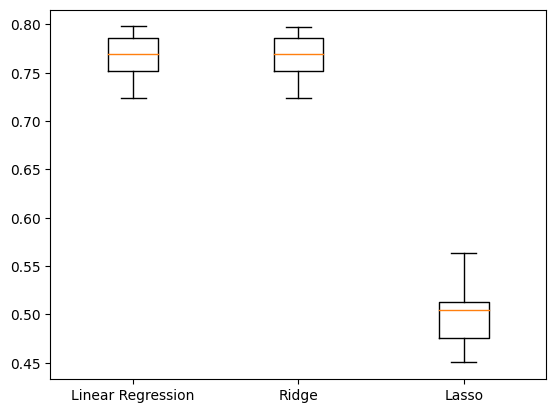

In [24]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Create X and y
X = music_dummies.drop("energy", axis=1).values
y = music_dummies["energy"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.title("Comparing regression model cv results on fitting energy")
plt.show()



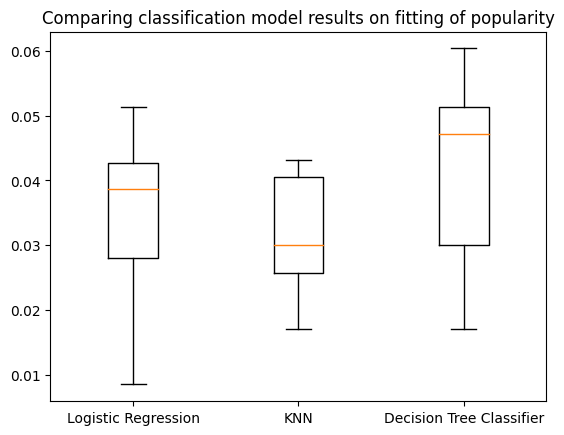

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.title('Comparing classification model results on fitting popularity')
plt.show()

Model comparison with hyperparameter tuning:

```
 # Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, Accuracy: 0.82
```


## Where to go from here?

Machine Learning with Tree Based Models in Python
Preprocessing for Machine Learning in Python 
Model Validation in Python 
Feature Engineering for Machine Learning in 
Python Unsupervised Learning in Python
Machine Learning Projects